## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [36]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd
from time import time
%matplotlib inline
from sklearn.metrics import confusion_matrix
from IPython.display import display

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [37]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

In [38]:
# Calculate value counts for the Survived column
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

First, check for missing data and remove all columns containing missing data

In [39]:
# Calculate NA values per column, since the data set is small, just used info to find null values.
data.drop(['Age', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


We also drop columns that are not informative and contain too many unique values(e.g. name)

In [41]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'PassengerId' has 891 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 891 unique values
Column with name 'Sex' has 2 unique values
Column with name 'SibSp' has 7 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Ticket' has 681 unique values
Column with name 'Fare' has 248 unique values


In [42]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [44]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.
data['Sex'] = np.where(data['Sex'] == 'male', 0,1)

In [45]:
# Let's check the new columns
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,7.2500
1,1,1,1,1,0,71.2833
2,1,3,1,0,0,7.9250
3,1,1,1,1,0,53.1000
4,0,3,0,0,0,8.0500


Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [46]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split
X = data[['Pclass', 'Fare', 'Sex', 'SibSp', 'Parch']]
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [47]:
from sklearn.neighbors import KNeighborsClassifier
# answer below:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [48]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy for train:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy for test:",metrics.accuracy_score(y_test, y_pred_test))
print("Accuracy for train:",metrics.f1_score(y_train, y_pred_train))
print("Accuracy for test:",metrics.f1_score(y_test, y_pred_test))

Accuracy for train: 0.9101123595505618
Accuracy for test: 0.7653631284916201
Accuracy for train: 0.8749999999999999
Accuracy for test: 0.676923076923077


Would you say the model overfits? Why or why not? Put your answer in the comment below.

Yes the model overfits, since the difference between the train and model is 15%

Yes it is definetly overfits, because there is 15% difference between train and test.

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [64]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = list(range(1, 15, 2))

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [65]:
for k_values in k_list:
    knn = KNeighborsClassifier(n_neighbors=k_values)
    fit = knn.fit(X_train, y_train)
    accuracy_train.append(accuracy_score(y_train, knn.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test, knn.predict(X_test)))
    f1_train.append(f1_score(y_train, knn.predict(X_train)))
    f1_test.append(f1_score(y_test, knn.predict(X_test)))
    
print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)

[0.9101123595505618, 0.8651685393258427, 0.8370786516853933, 0.8188202247191011, 0.8075842696629213, 0.7893258426966292, 0.7851123595505618]
[0.7653631284916201, 0.7988826815642458, 0.7430167597765364, 0.7653631284916201, 0.7653631284916201, 0.7541899441340782, 0.7206703910614525]
[0.8749999999999999, 0.8241758241758241, 0.7803030303030303, 0.7684021543985636, 0.7513611615245008, 0.7201492537313433, 0.7253141831238779]
[0.676923076923077, 0.7391304347826085, 0.6567164179104478, 0.704225352112676, 0.704225352112676, 0.6901408450704225, 0.6666666666666666]


In [35]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy for train:",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy for test:",metrics.accuracy_score(y_test, y_pred_test))
print("F1 score for train:",metrics.f1_score(y_train, y_pred_train))
print("F1 score for test:",metrics.f1_score(y_test, y_pred_test))

Accuracy for train: 0.7724719101123596
Accuracy for test: 0.7262569832402235
F1 score for train: 0.7011070110701106
Fq score for test: 0.6797385620915033


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

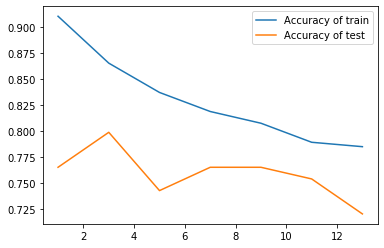

In [66]:
plt.figure()
plt.plot(k_list, accuracy_train)
plt.plot(k_list, accuracy_test)
plt.legend(['Accuracy of train', 'Accuracy of test'])
plt.show()

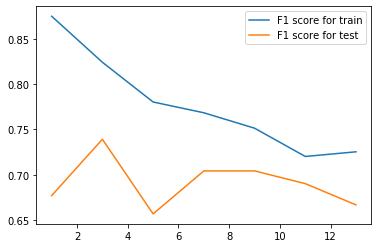

In [67]:
plt.figure()
plt.plot(k_list, f1_train)
plt.plot(k_list, f1_test)
plt.legend(['F1 score for train', 'F1 score for test'])
plt.show()

Please comment the results of the plots above

In [ ]:
# Add your observations in comments below.
#It seems that for accuracy scores the sweet spot is at k_neighbors 7, because at 7 test and score get very close
#Where as, for F1 score it is more like 11.
